<a href="https://colab.research.google.com/github/ShauryaSingh19/Decline-Curve-Analysis/blob/main/DCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from plotly.offline import iplot

import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('plot-data.csv')

In [ ]:
df.columns = ['Month', 'Year', 'Monthly Production(bbls)', 'Cumm Production(bbls)']

In [ ]:
coeffs = np.polyfit(df['Month'],df['Monthly Production(bbls)'] , deg=2)

In [ ]:
coeffs

array([  134.42957043, -3319.61938062, 30963.59090909])

In [ ]:
q_p = coeffs[0]*(df['Month']**2) + coeffs[1]*df['Month'] + coeffs[2]

In [ ]:
df.head()

,Month,Year,Monthly Production(bbls),Cumm Production(bbls)
0,1,1952,29500,29500
1,2,1952,23606,53106
2,3,1952,21301,74407
3,4,1952,19318,93725
4,5,1952,17599,111324


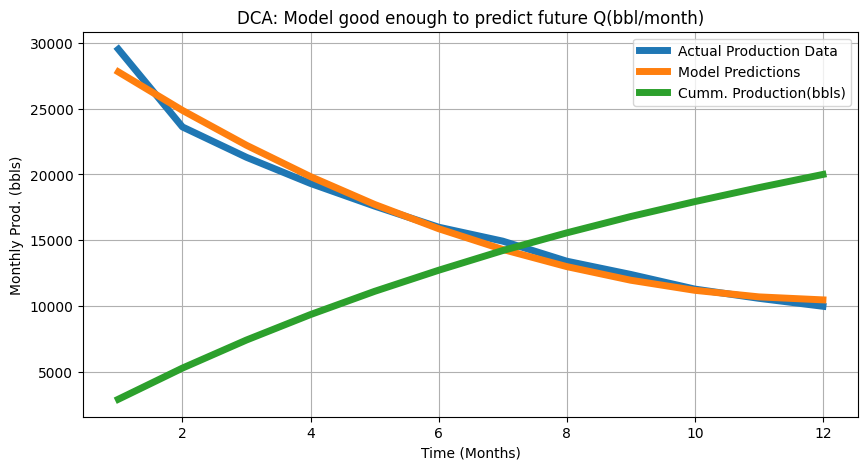

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('default')

plt.plot(df['Month'], df['Monthly Production(bbls)'] , linewidth='5' ,label = 'Actual Production Data')

plt.plot(df['Month'], q_p , linewidth='5',label = 'Model Predictions')

plt.plot(df['Month'], df['Cumm Production(bbls)']/10, linewidth='5', label = 'Cumm. Production(bbls)')



plt.xlabel('Time (Months)')
plt.ylabel('Monthly Prod. (bbls)')


plt.legend(loc='best')
plt.title('DCA: Model good enough to predict future Q(bbl/month)')
plt.grid()


In [ ]:
trace0 = go.Scatter(x=df['Month'], y=df['Monthly Production(bbls)'], mode='lines+markers', name='Actual Data')
trace1 = go.Scatter(x=df['Month'], y=q_p, mode='lines+markers', name='Modelled Data')


data = [trace0 , trace1]

layo = go.Layout(title='Decline Curve Analysis ')
# plt.style.use('default')

fig = go.Figure(data=data , layout = layo)
# iplot(df['Month'], df['Monthly Production(bbls)'] )

# iplot(df['Month'], q_p )

# iplot(df['Month'], df['Cumm Production(bbls)']/10)

iplot(fig)



# plt.xlabel('Time (Months)')
# plt.ylabel('Monthly Prod. (bbls)')


# plt.legend(loc='best')
# plt.title('DCA: Model good enough to predict future Q(bbl/month)')
# plt.grid()